Linear Regression Practical Implementation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('height_weight_dset.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
print(df.columns)

Index(['Weight ', 'Height'], dtype='object')


Text(0, 0.5, 'Weight')

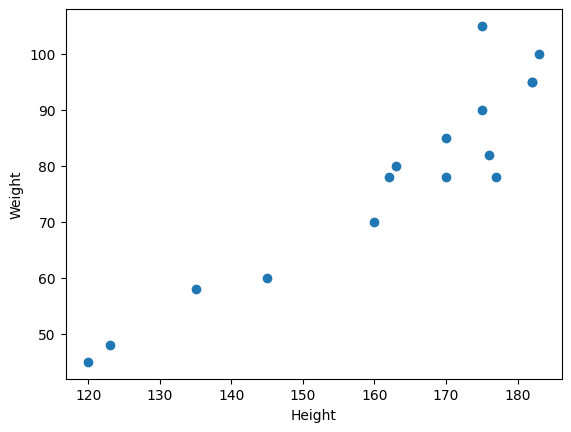

In [5]:
## scatter plot
plt.scatter(df['Height'],df['Weight '])
plt.xlabel("Height")
plt.ylabel("Weight")

In [6]:
df.corr()

,Weight,Height
Weight,1.000000,0.934236
Height,0.934236,1.000000


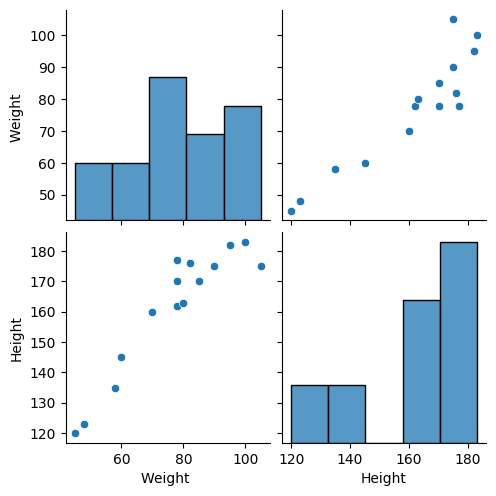

In [7]:
import seaborn as sns
sns.pairplot(df)

In [8]:
# Independent and dependent features
X = df[['Weight ']]  ### Independent features should be data frame or 2 dimensional array
y = df['Height']

In [9]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
np.array(X)

array([[ 45],
       [ 58],
       [ 48],
       [ 60],
       [ 70],
       [ 78],
       [ 80],
       [ 90],
       [ 95],
       [ 78],
       [ 82],
       [ 95],
       [105],
       [100],
       [ 85],
       [ 78]])

In [12]:
np.array(X).shape

(16, 1)

In [13]:
X_series= df['Weight ']  

In [14]:
X_series

0      45
1      58
2      48
3      60
4      70
5      78
6      80
7      90
8      95
9      78
10     82
11     95
12    105
13    100
14     85
15     78
Name: Weight , dtype: int64

In [15]:
np.array(X_series).shape

(16,)

In [16]:
type(X_series)

pandas.core.series.Series

In [17]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
Name: Height, dtype: int64

In [18]:
np.array(y).shape

(16,)

In [19]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42 )

In [21]:
X_train

,Weight
11,95
8,95
9,78
2,48
15,78
4,70
7,90
10,82
12,105
3,60


In [22]:
X_train.shape

(11, 1)

In [23]:
## Standardization
## to bring all the features to the same scale so that they have , mean = 0 & standard deviation = 1
## we use Z-score normalization :  z = (x - mean of the feature)/standard deviation of the feature
## Standardization is important because many ML algorithms perform poorly when features are on different scales

from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

## fit : Learn mean & std from training data and store the values internally
## transform : the scaler applies the standardization formula using learned values

In [25]:
X_train_scaled

array([[ 0.94970785],
       [ 0.94970785],
       [-0.13319074],
       [-2.04418824],
       [-0.13319074],
       [-0.64279007],
       [ 0.63120827],
       [ 0.12160893],
       [ 1.58670702],
       [-1.27978924],
       [-0.0057909 ]])

In [26]:
## We use fit_transform() on X_train to learn the scaling parameters (mean & standard deviation) and apply them.
## We use only transform() on X_test to avoid data leakage and ensure that both train and test data are scaled consistently using the same parameters.

In [27]:
X_test_scaled = scaler.transform(X_test)

In [28]:
X_test_scaled

array([[-2.23528799],
       [-1.40718907],
       [-0.13319074],
       [ 0.31270868],
       [ 1.26820744]])

In [29]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [30]:
regression = LinearRegression(n_jobs=-1)  ## how many CPU cores the algo is allowed to use while running....-1 to use ALL available CPU cores (fastest)

In [31]:
regression.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [32]:
regression.coef_    ## slope or coefficient

array([15.29271806])

In [33]:
regression.intercept_    ## intercept

np.float64(166.1818181818182)

In [34]:
print("Coefficient or Slope : ",regression.coef_ )    ## one unit movement in the weight value(x axis) will lead to to 15.292.. movement in the height value(y axis)
print("Intercept : ",regression.intercept_ )

Coefficient or Slope :  [15.29271806]
Intercept :  166.1818181818182


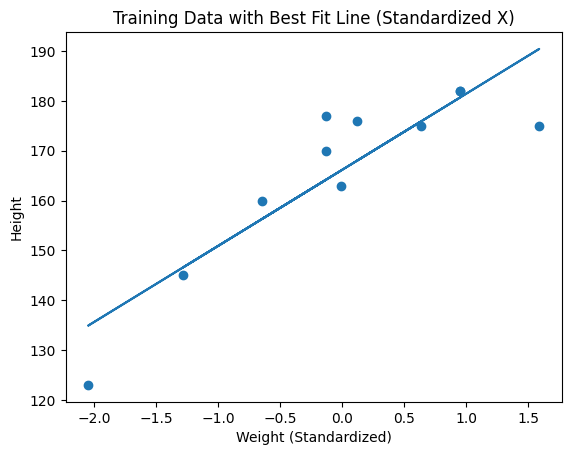

In [35]:
## plot Training data plot best fit line
plt.scatter(X_train_scaled, y_train)
plt.plot(X_train_scaled, regression.predict(X_train_scaled))
plt.xlabel("Weight (Standardized)")
plt.ylabel("Height")
plt.title("Training Data with Best Fit Line (Standardized X)")
plt.show()

In [36]:
## Prediction for test data
## predicted height output = intercept + coef(weights)
## y_pred_test = 166.2 + 15.3(X_test)

y_pred = regression.predict(X_test_scaled)

In [37]:
## Performance METRICS

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("MSE : ",mse)
print("MAE : ",mae)
print("RMSE : ",rmse)

MSE :  49.89578626487294
MAE :  5.469074446680082
RMSE :  7.063694944211063


In [39]:
## R square Formula
## R^2 = 1 - SSR/SST
## R^2 = coefficient of determination
## SSR = sum of square of Resisual
## SST = sum of square of Total

## R^2 tells how much your input (X) explains the output (y)

## Closer to 1 = better model

## Closer to 0 = poor model

## Negative = model is worse than useless

In [40]:
from sklearn.metrics import r2_score

In [41]:
score = r2_score(y_test, y_pred)
print("R2 score : ", score)

R2 score :  0.9068413251215964


In [42]:
## OLS Regression : Find the best-fitting line by minimizing the sum of squared errors

In [43]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train_scaled).fit()

In [44]:
prediction = model.predict(X_test_scaled)
print(prediction)

[-34.18362905 -21.51974575  -2.03684836   4.78216572  19.39433876]


In [45]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.091
Method:                 Least Squares   F-statistic:                            0.08450
Date:                Sun, 23 Nov 2025   Prob (F-statistic):                       0.777
Time:                        21:37:02   Log-Likelihood:                         -71.864
No. Observations:                  11   AIC:                                      145.7
Df Residuals:                      10   BIC:                                      146.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [46]:
## Prediction for new data
regression.predict(scaler.transform([[72]]))             ##scikit-learn models always expect a 2D array as input

C:\Users\Meghali\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.3001006])

Ridge Regression Practical Implementation

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [48]:
ridge_regressor = Ridge()

In [49]:
ridge_regressor

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [50]:
parameters={'alpha':[1,2,5,7,10,20,25,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train_scaled, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [51]:
print(ridgecv.best_params_)

{'alpha': 1}


In [52]:
print(ridgecv.best_score_)

-116.63312064332925


In [53]:
ridge_pred=ridgecv.predict(X_test_scaled)

In [54]:
ridge_pred

array([134.84682489, 146.45538458, 164.31470718, 170.56547009,
       183.95996204])

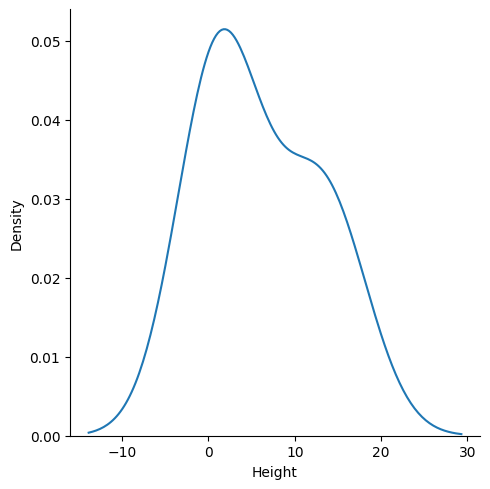

In [55]:
sns.displot(ridge_pred-y_test, kind='kde')

In [56]:
score=r2_score(ridge_pred,y_test)

In [57]:
score

0.7643784766101427

Lasso Regression Practical Implementation

In [58]:
from sklearn.linear_model import Lasso

In [59]:
lasso=Lasso()

In [60]:
parameters={'alpha':[1,2,5,7,10,20,25,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train_scaled, y_train)

,estimator,Lasso()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [61]:
print(lassocv.best_params_)

{'alpha': 1}


In [62]:
print(lassocv.best_score_)

-119.29382273307503


In [63]:
lasso_pred=lassocv.predict(X_test_scaled)

In [64]:
lasso_pred

array([134.23347713, 146.06926151, 164.27816055, 170.65127522,
       184.30794951])

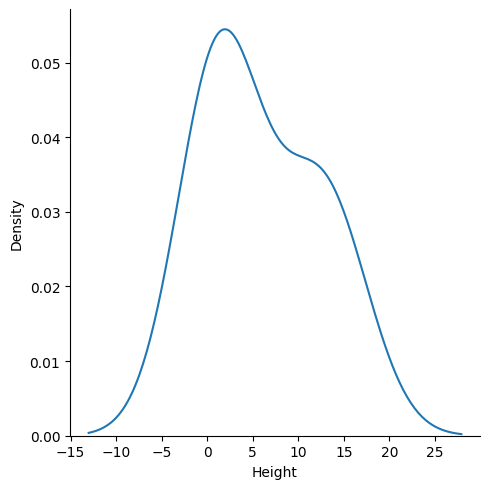

In [65]:
sns.displot(lasso_pred-y_test, kind='kde')